# Linear Models and Symbolic AI : Fast Linear Modelling and Error Rules

## Intelligent Control Systems 

### MSc Cesar Arturo Angeles Ruiz

Welcome to the fourth session of the __laboratory in Intelligent Control Systems__. In previous exercises we discovered a bit of the type and form of our data by the means of __descriptive statistics__. We discovered that data could be summarised by three important components:

- __Central Values__: (firsts moments of data) Mean, mode and median.
- __Dispersion Values___: (second moments) Variance, inter-quartile range, range.
- __Associativity tests__: Spearman, Pearson, cross-correlation; among others.

They allowed us to discover relations and initial glimpse of the amount of information they might contain in respect to the __output or predicted variable__ hypothesis. Now is the moment to start testing our hypothesis by training our first model and validating the results over a performance metric. Once the model is revised and validated, we could come back and make new hypotheses or proceed with a __control, decision-making tasks or simply report the results__, in order to make an impact on what we discovered.


<img src="imgs/eda.jpg" alt="Drawing" style="width: 200px;"/>

In this laboratory, we will explore the realisation of our first model with the data that we had explored during the __EDA__. We will design our first self_contained __learning agent__ with pipeline objects and train it with different predictor variables. Furthermore, we will discover several __performance metrics__ that will guide us towards the validation of our model, finalising with a full picture of how good the model is via the __prediction of new signals__. We will continue with our Electric Vehicle Motor data, to see if we can help control the temperature to aument its autonomy while its driven. 

<img src="imgs/linear_model.svg" alt="Drawing" style="width: 500px;"/>






# Electric Vehicle Temperature Best Predictors

## Feature Engineering 

Now that we have observed some of the central and dispersion values within our __training set__ (remember: the test set is like working: It is sacred, do not touch it - just kidding), you probably discovered that some of the best __original__ descriptor variables seem to be: __---, a subset of the electrical variables, the torque and even the permanent motor temperature__. However, you probably realised that some variables could be even combined into single new variables called __interactions__. E.g: We said that instead of having one variable for the q-terminal voltage and current we could combine it into the q terminal __power__. This process of combining relevant variables is well known as __Feature or Data Engineering__ and it is one important part of the hypothesis formulation during the definition of predictor variables.

<img src="imgs/clever.jpg" alt="Drawing" style="width: 200px;"/>

Did you manage to discover other interesting interactions? You can try some now... But first! Lets load our favourite set of tools!


In [1]:
## Load the data processing modules !
#
#
# Yeah boi!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

## Dealing with Data Snooping

On the previous lab, we could not stopped reiterating the importance of keeping the __test set__ safe to avoid __invalidating the project__ flow and results. For this reason, after the test-train split has been made, we strongly recommended generating two new datasets saved separately, and loading only the training set one. Now is the time to do so if was not previously done. This will avoid the previously mentioned __data snooping__ fallacy that couls invalidate your whole work 😱! You would not like that after hours of head-breaking coding 😓. 

You can save your training set with the ```python DataFrame.to_csv(PATH)``` method of your training and test set DataFrames by:

```python

training_set.to_csv('data/training_set.csv')
test_set.to_csv('data/test_set.csv')

```


In [2]:
## Save your separate DataFrames and load only the training set for security
# Lectura de los archivos CSV que se guardaron la practica pasada
training_data = pd.read_csv('../Telemetry Motor/training_data.csv', index_col='profile_id')
test_data = pd.read_csv('../Telemetry Motor/test_data.csv',index_col='profile_id')

Once your test set is safe and sound, you can delete any python object (yes that is for your training set in this case) with the ```python del <object> ``` operator:

```python 
del test_set
```




In [3]:
## Delete as many objects as you consider may interfere with the project... or your life.
# Hacer copia de los archivos CSV
df_training = training_data.copy()
df_test = test_data.copy()

In [4]:
# Borrar los DataFrames leídos
del training_data,test_data

In [5]:
df_training.head(5)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,electrical_power_ud_id,electrical_power_uq_iq,mechanical_power
profile_id,,,,,,,,,,,,,,,
73,-0.856472,-0.702224,0.324544,-1.246315,-1.220844,-0.254745,1.028947,-0.244656,-2.402573,-1.531758,-1.805995,-1.780012,0.333939,0.304919,0.311004
73,-0.854174,-0.701436,0.309735,-1.224041,-1.214324,-0.034500,0.932858,0.005023,-2.402709,-1.532241,-1.806657,-1.780037,0.288939,-0.006149,0.041894
73,-0.853727,-0.700841,0.292015,-1.195646,-1.204999,0.242926,0.793163,0.311426,-2.402782,-1.532357,-1.808064,-1.780679,0.231616,-0.372355,-0.292726
73,-0.856036,-0.700030,0.279220,-1.174930,-1.198096,0.439201,0.694956,0.528466,-2.401566,-1.532348,-1.806952,-1.781206,0.194045,-0.620910,-0.526205
73,-0.857299,-0.699994,0.269044,-1.158621,-1.192209,0.575081,0.624945,0.678608,-2.401715,-1.532334,-1.803437,-1.781860,0.168138,-0.786250,-0.685616


In [6]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744992 entries, 73 to 58
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ambient                 744992 non-null  float64
 1   coolant                 744992 non-null  float64
 2   u_d                     744992 non-null  float64
 3   u_q                     744992 non-null  float64
 4   motor_speed             744992 non-null  float64
 5   torque                  744992 non-null  float64
 6   i_d                     744992 non-null  float64
 7   i_q                     744992 non-null  float64
 8   pm                      744992 non-null  float64
 9   stator_yoke             744992 non-null  float64
 10  stator_tooth            744992 non-null  float64
 11  stator_winding          744992 non-null  float64
 12  electrical_power_ud_id  744992 non-null  float64
 13  electrical_power_uq_iq  744992 non-null  float64
 14  mechanical_power       

In [7]:
df_training.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ambient,744992.0,-0.004234,0.978053,-5.239872,-0.595073,0.258698,0.669278,2.967117
coolant,744992.0,0.073883,1.018499,-1.326642,-1.025135,-0.072124,0.838960,2.649032
u_d,744992.0,0.026214,0.994362,-1.655373,-0.855538,0.297015,0.359890,2.274734
u_q,744992.0,-0.013542,1.001887,-1.861463,-0.966119,-0.098944,0.824636,1.793498
motor_speed,744992.0,-0.025069,0.995540,-1.371529,-0.951898,-0.140247,0.822901,2.024164
torque,744992.0,-0.032904,0.994403,-3.345953,-0.318824,-0.253427,0.476804,3.016971
i_d,744992.0,0.030146,1.001968,-3.245874,-0.752571,0.274398,1.026655,1.060937
i_q,744992.0,-0.034924,0.992238,-3.341639,-0.312299,-0.245700,0.486913,2.914185
pm,744992.0,0.016017,0.983586,-2.631991,-0.636995,0.139632,0.691354,2.704275
stator_yoke,744992.0,0.056861,1.017888,-1.834688,-0.734725,0.011358,0.789081,2.449158


__Remember__: 
Maintaining a clean environment saves space in RAM, the possibility of modifying mutable objects (cross reference objects by mistake) and avoid overwhelming amounts of repeated data and lose track of the latest version.

## Self-Contained Agents

But now, you may be wondering, if a new column was generated or a new __interaction was formed__ from the same data. Would not we need the same number of predictors in the trainig set than in the test set? And where would I take that data from? 

Once more you are right! (you are on fire 🔥 ). 

<img src="imgs/amaze.jpg" alt="Drawing" style="width: 250px;"/>

Whenever an interaction or another value was added as part of the predictor, it is important that: 
- Interaction variables should be generated with the new data:
- Imputed values from the __training data__. 

__CAUTION__: Calculating __test_statistics__ from new data or from the test set can sometimes be considered as snooping as well.

## And so how can I automate these behaviour to be applied to all data? 

You guessed right (Due to the section title... I know lol) through the agent procedure. 

### Transformer / Estimator Generation

Sklearn allows us to start generating __sequences of transformations__ to easily encapsulate agent behaviour within a dataframe. These transformations are set within a ``` Transformation Pipleline ```. These pipelines, however, all processes must be either __transformers or estimators__ (i.e inherit from the sklearn's __BaseEstimator and TransformerMixin__ classes). Lets try creating our agent behaviour of adding electric power automatically! 

## - Optional

```python 

# First import the base modules for Python to recognise base clases

from sklearn.base import BaseEstimator, TransformerMixin

# Then define your new agent class inheriting the BaseEstimator and TransformerMixIn classes

class PowerGenerator(BaseEstimator, TransformerMixin):
    """ PowerGenerator class calculates and returns values of power defined by some columns variables
        
        Constructor:
        ------------
                PowerGenerator(calculate_power, columns):
            
            
    """
    def __init__(self, calculate_power = True, columns = None):
        """ PowerGenerator() constructs a PowerGenerator Object
        
        Parameters:
        -----------
                calculate_power : boolean
                    set up flag
                    
                columns : list of str
                    List of column names to calculate the power from 
                    
        Returns:
        --------
                PowerGenerator transformer
        """
        self.calculate_power = calculate_power
        if columns is not None:
            self.columns = columns
        else:
            self.columns = None
            
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        if self.columns is None:
            print("set voltage and current variables")
        else: 
            return np.c[X, X[self.columns[0]]*X[self.columns[1]]
                   
```
        



In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

# Then define your new agent class inheriting the BaseEstimator and TransformerMixIn classes

class PowerGenerator(BaseEstimator, TransformerMixin):
    """ PowerGenerator class calculates and returns values of power defined by some columns variables
        
        Constructor:
        ------------
                PowerGenerator(calculate_power, columns):
            
            
    """
    def __init__(self, calculate_power = True, columns = None):
        """ PowerGenerator() constructs a PowerGenerator Object
        
        Parameters:
        -----------
                calculate_power : boolean
                    set up flag
                    
                columns : list of str
                    List of column names to calculate the power from 
                    
        Returns:
        --------
                PowerGenerator transformer
        """
        self.calculate_power = calculate_power
        if columns is not None:
            self.columns = columns
            print(self.columns)
        else:
            self.columns = None
            
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        if self.columns is None:
            print("set voltage and current variables")
        else: 
            if self.columns[0] == 'u_q':
                potencia = 'e_power'
            else:
                potencia = 'mech_power'
            return pd.DataFrame(np.c_[X, X[self.columns[0]]*X[self.columns[1]]], index= X.index,
                                columns= X.columns.append(pd.Index([potencia])))

In [9]:
## Try generating the power column via the transformer!
# Hint: 
# Uso del transformador
e_power = PowerGenerator(True, columns = ['i_q', 'u_q'])
e_power.transform(df_training[['i_q','u_q']])

['i_q', 'u_q']


,i_q,u_q,mech_power
profile_id,,,
73,-0.244656,-1.246315,0.304919
73,0.005023,-1.224041,-0.006149
73,0.311426,-1.195646,-0.372355
73,0.528466,-1.174930,-0.620910
73,0.678608,-1.158621,-0.786250
...,...,...,...
58,0.065066,1.402122,0.091231
58,0.064728,1.400851,0.090674
58,0.064650,1.401337,0.090597


In [10]:
mechanical_power = PowerGenerator(True, columns = ['motor_speed','torque'])
mechanical_power.transform(df_training[['motor_speed','torque']])

['motor_speed', 'torque']


,motor_speed,torque,mech_power
profile_id,,,
73,-1.220844,-0.254745,0.311004
73,-1.214324,-0.034500,0.041894
73,-1.204999,0.242926,-0.292726
73,-1.198096,0.439201,-0.526205
73,-1.192209,0.575081,-0.685616
...,...,...,...
58,1.501900,0.075151,0.112870
58,1.501902,0.075151,0.112870
58,1.501905,0.075151,0.112870


### Agent Behaviour through a Pipeline

Once all transformations and estimators have been designed, its time to put all together. 

Pipelines work with the simple principle of concatenating functions one after another. That means, they encapsulate the behaviour of several Transformers and Estimators into a single one, allowing to save time and even to be programmed on the fly for on-line learning!

To create a new Pipeline you need first to import the ```sklearn.pipeline``` module and enumerate its processes via a process tuple list. eg.


```python 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

agent_behaviour = Pipeline([
    ('power_gen', PowerGenerator()),
    ('other processes ...', process(...)),
])
    
transformer_output = agent_behaviour.fit_transform(input_data)

```

And voilà, all the processes into a single one! 
We will use this later on to automatically preprocess and train our simple model

In [11]:
## Try generating your own Agent "brain" through a Transformer Pipeline to add the power column!
# What other interactions could you think off?!
#
# Creación del pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Sebas = Pipeline ([ 
     ('power', PowerGenerator(columns = ['torque', 'motor_speed'])),
     ('e_power', PowerGenerator(columns = ['u_q','i_q']))
])

['torque', 'motor_speed']
['u_q', 'i_q']


In [12]:
# Modificación del test set, para que tengas las mismas columnas que el trainig set
df_test = Sebas.fit_transform(df_test)

In [13]:
df_test.head(5)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,mech_power,e_power
profile_id,,,,,,,,,,,,,,
27,-1.573522,-1.079855,0.318418,-1.261970,-1.222432,-0.249481,1.059361,-0.257275,-2.586638,-1.815265,-2.057888,-1.997500,0.304974,0.324674
27,-1.570727,-1.078587,0.319041,-1.261180,-1.222431,-0.248954,1.059546,-0.257235,-2.586512,-1.815220,-2.057704,-1.997449,0.304329,0.324419
27,-1.569534,-1.077925,0.319451,-1.259965,-1.222431,-0.248479,1.059731,-0.257275,-2.586651,-1.815155,-2.058269,-1.997681,0.303749,0.324157
27,-1.565308,-1.078293,0.320205,-1.258326,-1.222429,-0.247686,1.059832,-0.257255,-2.586524,-1.814182,-2.058675,-1.998159,0.302778,0.323710
27,-1.564357,-1.079536,0.319786,-1.259166,-1.222429,-0.247844,1.059898,-0.257253,-2.586874,-1.814276,-2.058739,-1.998198,0.302972,0.323925


# A Simple Model To Rule Some-Of-Them All

<img src="imgs/ring.jpg" alt="Drawing" style="width: 250px;"/>

## Variance Analysis

Once all of our predictor variables have been explored and we have our hypothesis! A last step that can guide you to a higher probability of prioritising relevant predictor variables is through the analysis of its variance. Just as explained in the previous lab, a descriptive variable is highly likely, under standarised conditions, to explain out prediction variable if they share similar distribution and variance. To demonstrate that, lets choose the torque of our vehicle as prediction variable, and our currents as predictor variables and analyse their behaviour towards one another. 



In order to analyse for distributions, the Seaborn package, in conjunction with pandas and numpy, facilitates those task under their stats modules. Seasborn allows us to visualise a parameter distribution via its method ```seasborn.distplot()```. This method, receives a dataframe or a numpy array and bins continuous or full discrete variables and perform a frequency plot. 

Lets try it!



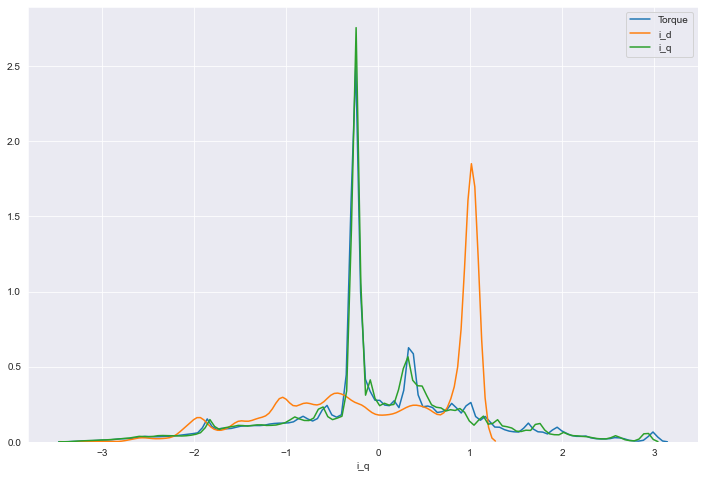

In [14]:
## Import Seaborn as sns and use the ? notation to explore how to utilise sns.distplot
#
#
# Visualise the different distributions between torque and the current variables. Which one seems like the 
# best predictor? How could you use this to explore for the temperature?
plt.figure(figsize=(12,8))
sns.distplot(df_training['torque'], kde=True, hist=False, label='Torque')
sns.distplot(df_training['i_d'],kde=True, hist=False, label='i_d')
sns.distplot(df_training['i_q'],kde=True, hist=False, label='i_q')

## Our Simple Statistial Friend

### Ordinary Least Squares Regressor

Finally, once all predictor variables are all in place, without empty or unkown values and preprocessed on to the needed data type, It is time to start putting to work our agents towards learning models. 

During this lab, a simple already know model is going to be utilised as its main focus is not yet choosing the best, but to have one so it can be controlled. One of the simplest models in statistics is our well known __Linear Regression__. However, linear regressions come in different flavours depending on the cost function (or error function) to minimise. Our first model will be the __Ordinary Least Squares model__ flavour one, which minimises (yes, you got it right) the MSE between the predicted and real output value of the data. Also, as it is the main part of our agent, of course it will be introduced into our __agent's brain or Transformer Pipeline__.

To start generating our agent we first need to import such learning algorithm, kindly given by __SciKit Learn__ under __Linear Regression__. 

```python 
from sklearn.linear_model import LinearRegression

# which you can instanciate as 

my_linear_model = LinearRegression()

```

In [15]:
# Instantiate a linear regression model 
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model2 = LinearRegression()
model_tot = LinearRegression()

Once my linear model has been instanciated we can start training it (with our ___ set of course) and looking at its performance. But wait 

### __How are we going to measure how good the model is?__.

The effectiveness of a model is always measured through a performance metric. Most of the times, the cost function and the performance metric coincide between each other. However, most of the times __this is not true__. So it is important to always define what we would like to optimise and then choose the performance metric towards getting information on how good our model is getting to its objective. 

Time and continuous variables are generally best evaluated through the __mean squared error__. Yes, this time the model's cost function and our performance metric is the same (Do not judge me 😅), this because of the nature of continuity within variables (Another topic for the greatest mathematicians).

You guessed right! Scikit learn also provides us of a MSE function that calculates it for us! 
Check out for ```Python's sklearn.metrics``` and import the Mean Squared Error function.

In [16]:
## Import the Mean_Squared_Error method!
from sklearn.metrics import mean_squared_error

### Training the model. 

Finally lets train our model. 

As you realised, Python divide learning classes in three different categories: __estimators, predictors and transformers__. __Estimators__ are special methods designed to manage data to estimate test statistics, operating on variables, among other functionalities. __Transformers__ are designed to transform batches of data within a dataframe. E.g: our ```python PowerGenerator class is a great example of a Transformer class```. Lastly, __Predictors__ are meant to be the learners defined for prediction. Our linear model is an example of an __Estimator__, and what is most important, is the way it operates!

Estimators have three main methods designed for learning: 
- fit()
- predict()
- score()

- fit --> Allows us to train a particular model to data under certain learning mechanism or motor. 
- predict --> The method able to compute new predictions upon input data. The process is performed under the inference motor of the specific model.
- score --> Measures the quality of the prediction given the real labels of the inferred data.

Then to start training our model, we can do this via the linear regression fit method!

Lets make an example. Imagine all we have is experiment number 4 from our training set. Also, lets asume we only would like to predict the __stator_winding__ temperature. Lets train our data using the electric variables in our dataframe and measure its performance separately. 

The process will look like:

```python 

exp_4 = motor_data_exp.loc[4,['i_d', 'u_q', 'i_q', 'u_q']]
out_4 = motor_data_exp.loc[4,['stator_winding']]


my_linear_model = LinearRegression()
my_linear_model.fit(exp_4, out_4)


# Once trained, lets find out what was learned through the model parameters:
# Do they make sense?

my_linear_model.coef_

# Finally, lets measure the model's performance of the fitted model.

stator_temp = my_linear_model.predict(exp_4)
mean_squared_error(out_4, stator_temp)

```

## Model Fit

Our first evaluation of the fitness in our model should always be a measure with its training data. This first metric tells you evidence on how good the model is trying to fit our observations perse. It is a bit like the R^2 metric for linear regression but for all models. If the fitness coefficient, in this case the MSE, is not good even from its own training data, we should probably reconsider a different model.

#### Which other predictior parameters could you use to improve the Model Fit Performance?




    

Another good way to explore how good a model is, is via visual exploration. You could try plotting the predicted and observed values to spot where the model is failing and formulating what could you do to compensate for that! 

# Model Validation 

And finally, we arrived to the final test of our model, the final validation. Most of the times, our prediction or objetive is so complex that we might not have an idea of what might be causing and interacting with it! For that reason, __prediction__ became part of what is starting to be known as __a extention of the scientific method__ (sounds big, right?!) It is believed that is you try to predict data that your model has never seen, then you have managed to capture a frame of what the real dynamic and distribution of the data is! And your model is even highly likely to perform in production. 

How would you validate a model! Now is time to see that famous test set we have been keeping for long! 

Turns out that validating through prediction is the same as model fit validation. Just remember, you should have exactly the __same predictor variables as the trained model__! Otherwise the model would not know what to do with the extra features 🥺.

Finally lets just emulate our validation process by picking any other experiment! Remember our process:

- Use our custome transformer to set the appropiate columns and tranformations.
- Select only the variables for which our model was trained.
- Try predicting the values with our already fit model. 
- Calculate the MSE to see how well it performed.


In [17]:
'''Modelo de regresión lineal con el cual se va a entrenar con todo el training set'''

var_predic_tot = ['i_d','i_q','electrical_power_uq_iq','mechanical_power','coolant','u_d','u_q'] #Lista de variables con las que vamos a entrenar

X_tot = df_training.loc[:,var_predic_tot]  #Separación de entrenamiento con las variables a entrenar
y_tot = df_training.loc[:,'stator_winding'] #Separación de entrenamiento con la variable a predecir

model_tot.fit(X_tot, y_tot) #Entrenamiento del modelo con todo el training set

print('Coeficientes: ',model_tot.coef_) #Impresion de los coeficientes del modelo con todo el training set

Coeficientes:  [-0.68012133  0.64504108 -0.03872967  0.55573874  0.58360854  0.62724789
  0.09675814]


In [18]:
predic_tot = model_tot.predict(X_tot) #Predicción hacia los mismos valores de entrenamiento, para checar el nivel de prediccion que se obtuvo, sobre el examen total
rms_tot = mean_squared_error(y_tot, predic_tot) #Obtencion de error entre valores reales y predecidos (entrenamiento) del modelo total

print('Rms: ',rms_tot) #Impresión de rms absoluto del modelo total

rang_tot = df_training['stator_winding'].max() - df_training['stator_winding'].min() #Obtención del rango de la variable a predecir
rms_relativo_tot = rms_tot/rang_tot #Obtención del rms relativo del modelo total

print('Rms_relativo: ',rms_relativo_tot)  #Impresion del error relativo del modelo 2

Rms:  0.38165751444041623
Rms_relativo:  0.08165974227661814


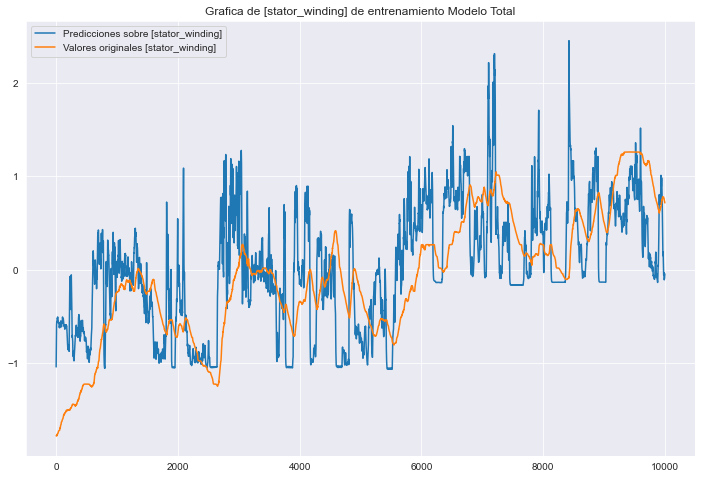

In [19]:
'''Grafica de los valores de entrenamiento originales y los predecidos con el modelo 2'''

plt.figure(figsize=(12,8))
plt.title('Grafica de [stator_winding] de entrenamiento Modelo Total')
plt.plot(predic_tot[:10000],label='Predicciones sobre [stator_winding]')
plt.plot(y_tot[:10000].values,label='Valores originales [stator_winding]')
plt.legend()

In [20]:
''' Obtencion de prediccion sobre el test set (datos nunca antes vistos), utilizando el modelo total'''

var_predic_test = ['i_d','i_q','e_power','mech_power','coolant','u_d','u_q'] #Lista de variables con las que vamos a predecir
X_test = df_test.loc[:,var_predic_test] #Separación del test set, con las variables que nos ayudarán a predecir
y_test = df_test.loc[:,'stator_winding'] #Separación de los resultados del test set
y_test_pred = model_tot.predict(X_test) #Obtencion de variable predictora, sobre valores no antes vistos

In [21]:
rms_test = mean_squared_error(y_test, y_test_pred)  #Obtencion de error entre valores reales y predecidos del modelo total
print('Rms: ',rms_test) #Impresiónn del rms absoluti
rang_test = df_test['stator_winding'].max() - df_test['stator_winding'].min() #Obtención rango
rms_relativo_test = rms_test/rang_test #Obtencion rms relativo
print('Rms_relativo: ',rms_relativo_test) #Impresion rms relativo

Rms:  0.3583056998346324
Rms_relativo:  0.07873984407531268


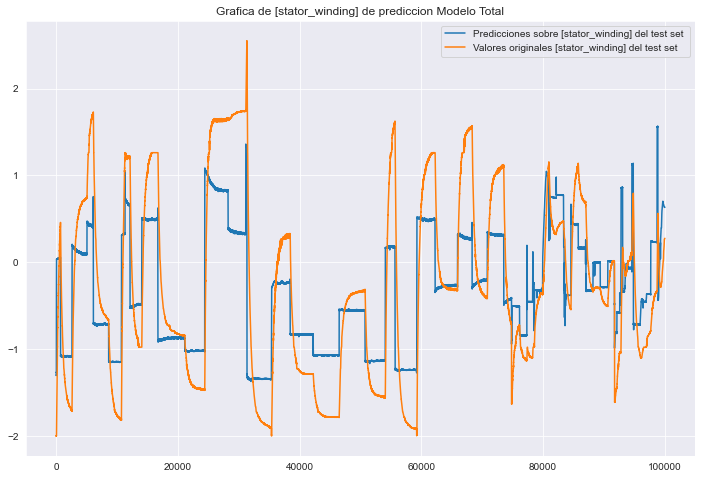

In [22]:
'''Grafica de los valores del test set y los predecidos con el modelo total'''
plt.figure(figsize=(12,8))
plt.title('Grafica de [stator_winding] de prediccion Modelo Total')
plt.plot(y_test_pred[:100000],label='Predicciones sobre [stator_winding] del test set ')
plt.plot(y_test[:100000].values,label='Valores originales [stator_winding] del test set')
plt.legend()


__How would you say if we have overfitted, underfitted or succeded? What other variables could you use and reformulate the model?
 Creo que logramos obtener la tendencia de los datos pero al mismo tiempo contamos con mucho ruido, esto hace que no se logre predecir con exactitud los datos.

### Remember: Once at the validation step YOU SHOULD NOT GO BACK AND TRY TO FIT THE MODEL WITH THE SAME DATA OR YOU WILL BE SNOOPING Unconsciously! (Introducing unconscious bias) 

Everytime you go back, choose different training and test data. We will learn how to deal with that later! 

In the meantime try it yourself and try to beat those odds!



# Thank you and see you next time!

<img src="imgs/bye.jpg" alt="Drawing" style="width: 250px;"/>